In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.tree as tree
import pydotplus
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("bank-marketing.txt")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df = df.drop('duration',axis=1)

In [4]:
df.shape

(41188, 20)

In [5]:
df.replace('unknown',np.NAN, inplace=True)

In [6]:
df = df.dropna()

In [7]:
df.shape

(30488, 20)

In [8]:
df.loc[:,'education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'professional.course',
       'basic.9y', 'university.degree', 'illiterate'], dtype=object)

In [9]:
df.replace({'education': {'illiterate':1.0, 'basic.4y': 2.0, 'basic.6y': 3.0, 'basic.9y': 4.0,
                         'high.school': 5.0, 'professional.course': 6.0,'university.degree': 7.0}},inplace=True)

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,2.0,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,5.0,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,3.0,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,5.0,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,6.0,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
df = pd.get_dummies(df, columns=['job','marital','default','housing','loan','contact','month','day_of_week','poutcome'])


In [13]:
df.columns

Index(['age', 'education', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [14]:
df.head(2)

,age,education,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,2.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,5.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
df.y.replace({'no':0,'yes':1},inplace=True)

In [16]:
X = df.drop('y',axis=1)
Y = df.y

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [18]:
X_train.shape

(21341, 50)

In [19]:
X_test.shape

(9147, 50)

In [20]:
clf_gini = tree.DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=3,min_samples_leaf=2)

In [21]:
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=1)

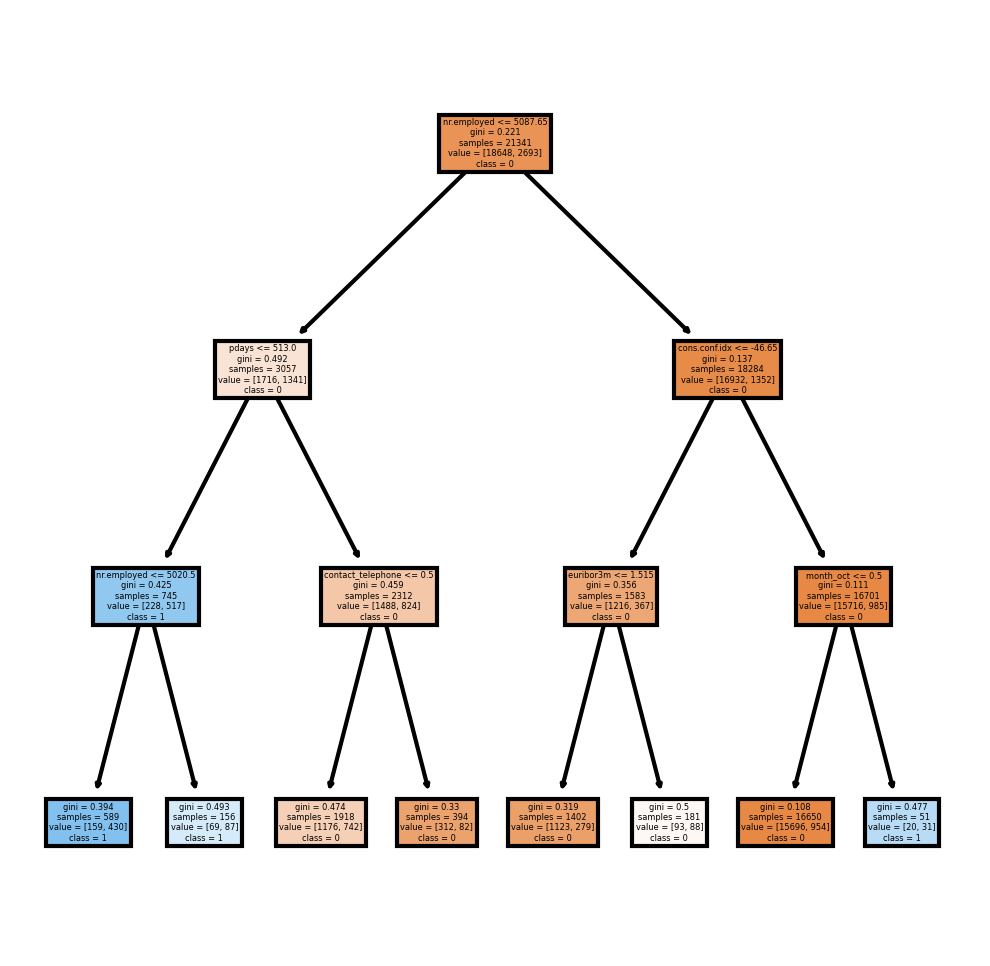

In [23]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf_gini,
           feature_names = list(X.columns), 
           class_names=['0','1'],
           filled = True);

fig.savefig('imagename.png')

In [24]:
from sklearn.metrics import accuracy_score
y_pred = clf_gini.predict(X_test)
print("Acc is ", accuracy_score(y_test,y_pred)*100.0)
print("ROC AUC is ", roc_auc_score(y_test,y_pred))

Acc is  88.90346561714223
ROC AUC is  0.6006357186654497


In [25]:
clf_gini = tree.DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=1,min_samples_leaf=2)
clf_gini.fit(X_train,y_train)
y_pred = clf_gini.predict(X_test)
print("Acc is ", accuracy_score(y_test,y_pred)*100.0)
print("ROC AUC is ", roc_auc_score(y_test,y_pred))

Acc is  87.25265114245107
ROC AUC is  0.5


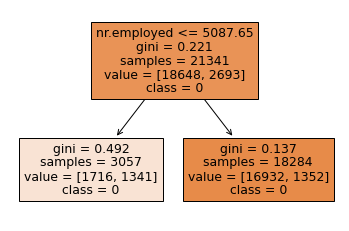

In [26]:
tree.plot_tree(clf_gini,
           feature_names = list(X.columns), 
           class_names=['0','1'],
           filled = True);

fig.savefig('imagename.png')

In [27]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_test,y_pred = y_pred)
print(conf_mat)

[[7981    0]
 [1166    0]]


In [32]:
clf_gini = tree.DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=6,min_samples_leaf=10)
clf_gini.fit(X_train,y_train)
y_pred = clf_gini.predict(X_test)
print("Acc is ", accuracy_score(y_test,y_pred)*100.0)
print("ROC AUC is ", roc_auc_score(y_test,y_pred))

Acc is  88.7066797857221
ROC AUC is  0.6225766039971002


In [33]:
conf_mat = confusion_matrix(y_true=y_test,y_pred = y_pred)
print(conf_mat)

[[7802  179]
 [ 854  312]]


In [36]:
df.y.value_counts()

0    26629
1     3859
Name: y, dtype: int64

In [39]:
df_majority = df[df.y==0]
df_minority = df[df.y==1]

In [40]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace=True, n_samples = len(df_majority), random_state=0)

In [41]:
len(df_minority_upsampled)

26629

In [44]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [45]:
X = df_upsampled.drop('y',axis=1)
Y = df_upsampled.y
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [52]:
clf_gini = tree.DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=3,min_samples_leaf=2)
clf_gini.fit(X_train,y_train)
y_pred = clf_gini.predict(X_test)
y_pred2 = clf_gini.predict(X_train)
print("Tst Acc is ", accuracy_score(y_test,y_pred)*100.0)
print("Tst ROC AUC is ", roc_auc_score(y_test,y_pred))
print("Trn Acc is ", accuracy_score(y_train,y_pred2)*100.0)
print("Trn ROC AUC is ", roc_auc_score(y_train,y_pred2))

Tst Acc is  74.68394041807485
Tst ROC AUC is  0.7461067486241193
Trn Acc is  73.73658798283262
Trn ROC AUC is  0.7376944472065025


In [53]:
clf_gini = tree.DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=3,min_samples_leaf=2)
clf_gini.fit(X_train,y_train)
y_pred = clf_gini.predict(X_test)
y_pred2 = clf_gini.predict(X_train)
print("Tst Acc is ", accuracy_score(y_test,y_pred)*100.0)
print("Tst ROC AUC is ", roc_auc_score(y_test,y_pred))
print("Trn Acc is ", accuracy_score(y_train,y_pred2)*100.0)
print("Trn ROC AUC is ", roc_auc_score(y_train,y_pred2))

Tst Acc is  74.68394041807485
Tst ROC AUC is  0.7461067486241193
Trn Acc is  73.73122317596567
Trn ROC AUC is  0.7376406316861064


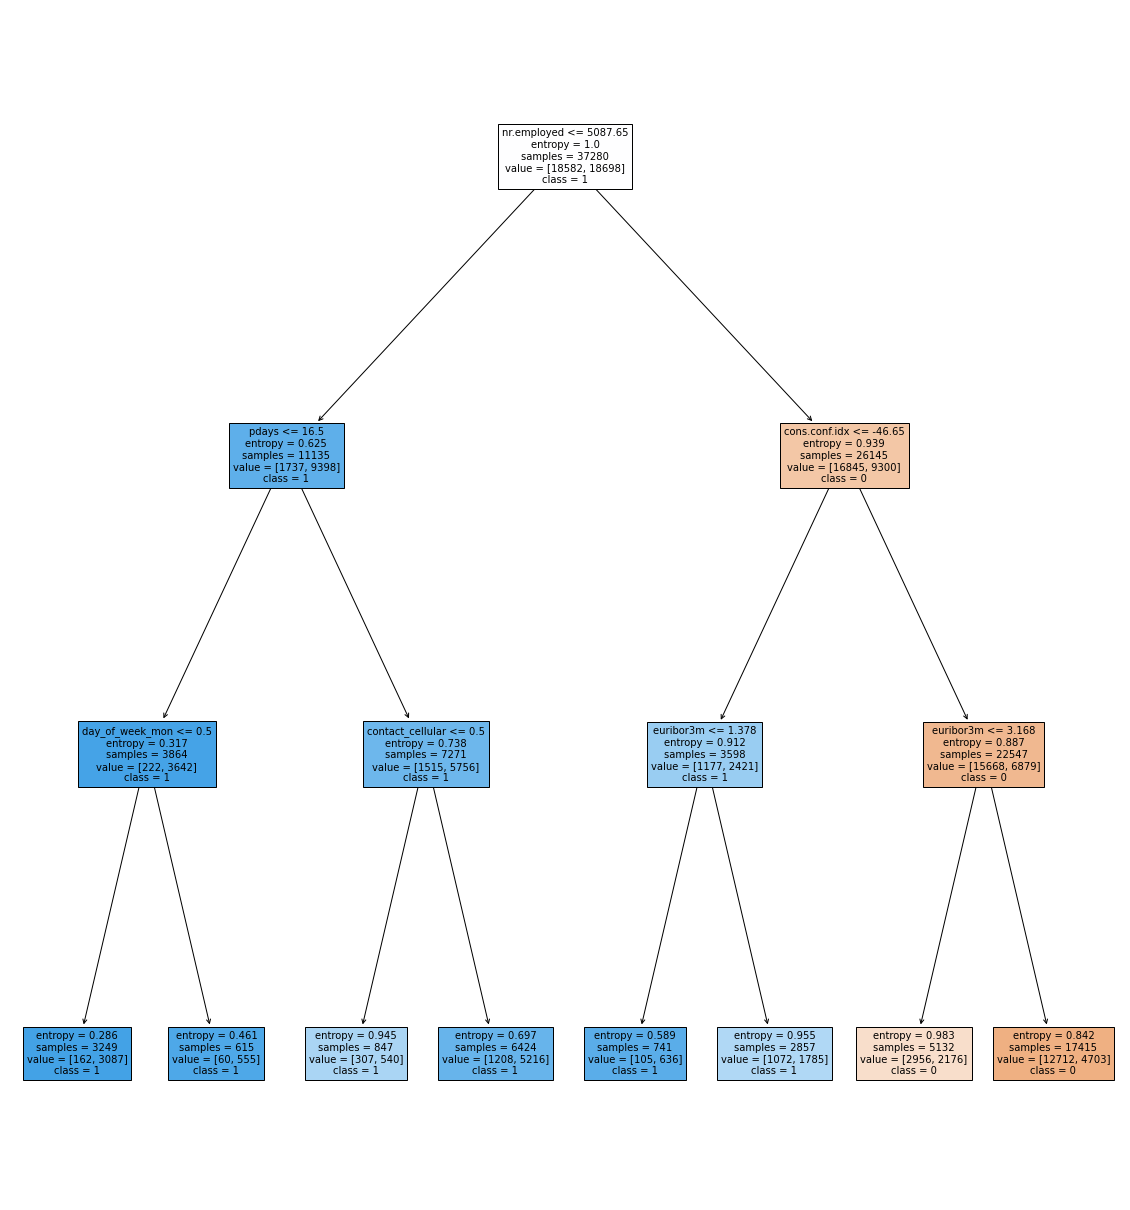

In [61]:

fig.savefig('imagename.png')

plt.figure(figsize=(20,22))  # set plot size (denoted in inches)
tree.plot_tree(clf_gini,
           feature_names = list(X.columns), 
           class_names=['0','1'],
           filled = True, fontsize=10);

#tree.plot_tree(clf, fontsize=10)
plt.show()

In [62]:
conf_mat = confusion_matrix(y_true=y_test,y_pred = y_pred)
print(conf_mat)

[[6816 1231]
 [2814 5117]]


In [64]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=5)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
print("Tst Acc is ", accuracy_score(y_test,y_pred)*100.0)
print("Tst ROC AUC is ", roc_auc_score(y_test,y_pred))
conf_mat = confusion_matrix(y_true=y_test,y_pred = y_pred)
print(conf_mat)

Tst Acc is  94.15446238578045
Tst ROC AUC is  0.9418977904006999
[[7188  859]
 [  75 7856]]


In [67]:
clf_rf = RandomForestClassifier(n_estimators=5,oob_score=True)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
print("Tst Acc is ", accuracy_score(y_test,y_pred)*100.0)
print("Tst ROC AUC is ", roc_auc_score(y_test,y_pred))
conf_mat = confusion_matrix(y_true=y_test,y_pred = y_pred)
print(conf_mat)

Tst Acc is  94.11691075228438
Tst ROC AUC is  0.9415240718627014
[[7183  864]
 [  76 7855]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
